## Develop Convolutional Neural Network Models

In [5]:
# import packages
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from matplotlib import pyplot 
import warnings 
warnings.filterwarnings("ignore") 

A popular image classification task is the MNIST handwritten digit classification. It involves tens of thousands of handwritten digits that must be classified as a number between 0 and 9.

The tf.keras API provides a convenience function to download and load this dataset directly.

In [7]:
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


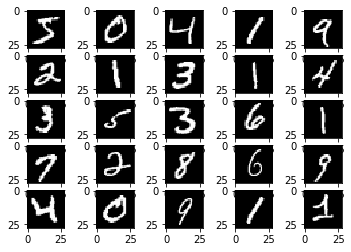

In [8]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(25):
    # define subplot
    pyplot.subplot(5, 5, i+1)
    # plot raw pixel data
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

We can train a CNN model to classify the images in the MNIST dataset.

Note that the images are arrays of grayscale pixel data; therefore, we must add a channel dimension to the data before we can use the images as input to the model. The reason is that CNN models expect images in a channels-last format, that is each example to the network has the dimensions [rows, columns, channels], where channels represent the color channels of the image data.

It is also a good idea to scale the pixel values from the default range of 0-255 to 0-1 when training a CNN.

In [9]:
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))


In [10]:
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)


(28, 28, 1) 10


In [11]:
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [12]:
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))


In [13]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 73s - loss: 0.3483 - accuracy: 0.8936 - val_loss: 0.0964 - val_accuracy: 0.9726
Epoch 2/10
48000/48000 - 72s - loss: 0.1414 - accuracy: 0.9590 - val_loss: 0.0658 - val_accuracy: 0.9818
Epoch 3/10
48000/48000 - 70s - loss: 0.1009 - accuracy: 0.9702 - val_loss: 0.0590 - val_accuracy: 0.9832
Epoch 4/10
48000/48000 - 70s - loss: 0.0810 - accuracy: 0.9751 - val_loss: 0.0581 - val_accuracy: 0.9833
Epoch 5/10
48000/48000 - 72s - loss: 0.0699 - accuracy: 0.9785 - val_loss: 0.0511 - val_accuracy: 0.9843
Epoch 6/10
48000/48000 - 70s - loss: 0.0608 - accuracy: 0.9814 - val_loss: 0.0530 - val_accuracy: 0.9843
Epoch 7/10
48000/48000 - 70s - loss: 0.0553 - accuracy: 0.9832 - val_loss: 0.0536 - val_accuracy: 0.9848
Epoch 8/10
48000/48000 - 66s - loss: 0.0502 - accuracy: 0.9836 - val_loss: 0.0504 - val_accuracy: 0.9848
Epoch 9/10
48000/48000 - 67s - loss: 0.0442 - accuracy: 0.9852 - val_loss: 0.0505 - val_accuracy: 0.9858
Epoch

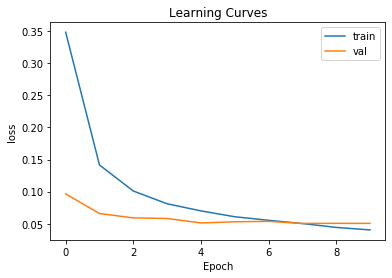

In [17]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [18]:
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)


Accuracy: 0.986


In [19]:
# make a prediction
image = x_train[0]
yhat = model.predict([[image]])
print('Predicted: class=%d' % argmax(yhat))

Predicted: class=5
